#### Forecasting Using FbProphet

In [1]:
pip install pystan

In [2]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Covid Dataset.csv',parse_dates=True)

In [4]:
df.head()

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected State,Current Status,Day,Month,Year
0,0,443.0,05/05/2021,NaN,NaN,Odisha,Hospitalized,5,5,2021
1,1,151.0,05/05/2021,NaN,NaN,Odisha,Hospitalized,5,5,2021
2,2,483.0,05/05/2021,NaN,NaN,Odisha,Hospitalized,5,5,2021
3,3,52.0,05/05/2021,NaN,NaN,Odisha,Hospitalized,5,5,2021
4,4,326.0,05/05/2021,NaN,NaN,Odisha,Hospitalized,5,5,2021


In [5]:
df.tail()

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected State,Current Status,Day,Month,Year
175752,12065,NaN,28/08/2021,NaN,NaN,NaN,NaN,28,8,2021
175753,12066,NaN,28/08/2021,NaN,NaN,NaN,NaN,28,8,2021
175754,12067,NaN,28/08/2021,NaN,NaN,NaN,NaN,28,8,2021
175755,12068,NaN,28/08/2021,NaN,NaN,NaN,NaN,28,8,2021
175756,12069,NaN,28/08/2021,NaN,NaN,NaN,NaN,28,8,2021


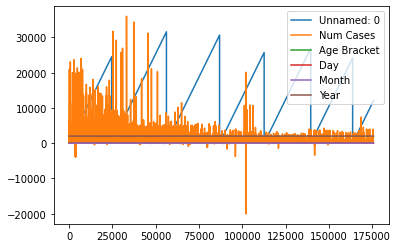

In [6]:
df.plot()

In [7]:
del df['Unnamed: 0']
del df['Age Bracket']
del df['Gender']
del df['Detected State']
del df['Current Status']
del df['Day']
del df['Month']
del df['Year']

In [8]:
df = df.dropna()
df

,Num Cases,Date Announced
0,443.0,05/05/2021
1,151.0,05/05/2021
2,483.0,05/05/2021
3,52.0,05/05/2021
4,326.0,05/05/2021
...,...,...
175431,521.0,28/08/2021
175432,550.0,28/08/2021
175433,13.0,28/08/2021
175434,1.0,28/08/2021


In [9]:
df.isna().sum()

Num Cases         0
Date Announced    0
dtype: int64

In [10]:
(df['Num Cases'].values < 0).any()

True

In [11]:
df = df[df['Num Cases'] > 0]

In [12]:
df

,Num Cases,Date Announced
0,443.0,05/05/2021
1,151.0,05/05/2021
2,483.0,05/05/2021
3,52.0,05/05/2021
4,326.0,05/05/2021
...,...,...
175431,521.0,28/08/2021
175432,550.0,28/08/2021
175433,13.0,28/08/2021
175434,1.0,28/08/2021


In [13]:
(df['Num Cases'].values < 0).any()

False

In [14]:
df.describe()

,Num Cases
count,173963.000000
mean,156.762881
std,584.433606
min,1.000000
25%,2.000000
50%,12.000000
75%,89.000000
max,36030.000000


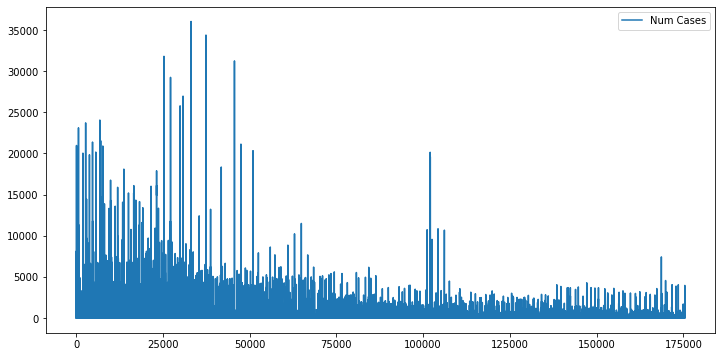

In [15]:
df.plot(figsize=(12,6))

In [16]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(Num_Cases):
    result=adfuller(Num_Cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [17]:
adfuller_test(df['Num Cases'])

ADF Test Statistic : -37.11040475113087
p-value : 0.0
#Lags Used : 78
Number of Observations Used : 173884
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [18]:
df.columns = ['y','ds']
df.head()

,y,ds
0,443.0,05/05/2021
1,151.0,05/05/2021
2,483.0,05/05/2021
3,52.0,05/05/2021
4,326.0,05/05/2021


In [19]:
df.drop(144,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
df.tail()

,y,ds
175431,521.0,28/08/2021
175432,550.0,28/08/2021
175433,13.0,28/08/2021
175434,1.0,28/08/2021
175435,6.0,28/08/2021


In [21]:
df['ds'] = pd.to_datetime(df['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
df.head()

,y,ds
0,443.0,2021-05-05
1,151.0,2021-05-05
2,483.0,2021-05-05
3,52.0,2021-05-05
4,326.0,2021-05-05


In [23]:
df.tail()

,y,ds
175431,521.0,2021-08-28
175432,550.0,2021-08-28
175433,13.0,2021-08-28
175434,1.0,2021-08-28
175435,6.0,2021-08-28


In [24]:
from fbprophet import Prophet

In [25]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [26]:
# Initialize the Model
model=Prophet()

In [27]:
df.columns

Index(['y', 'ds'], dtype='object')

In [28]:
df.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
df.head()

,y,ds
0,443.0,2021-05-05
1,151.0,2021-05-05
2,483.0,2021-05-05
3,52.0,2021-05-05
4,326.0,2021-05-05


In [30]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [32]:
df.tail()

,y,ds
175431,521.0,2021-08-28
175432,550.0,2021-08-28
175433,13.0,2021-08-28
175434,1.0,2021-08-28
175435,6.0,2021-08-28


In [33]:
### Create future dates of 50 days
future_dates=model.make_future_dataframe(periods=50)

In [34]:
future_dates.tail()

,ds
217,2022-03-14
218,2022-03-15
219,2022-03-16
220,2022-03-17
221,2022-03-18


In [35]:
prediction=model.predict(future_dates)

In [36]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-06,128.542556,-634.776761,847.724567,128.542556,128.542556,-4.143856,-4.143856,-4.143856,-4.143856,-4.143856,-4.143856,0.0,0.0,0.0,124.398700
1,2021-01-07,127.991025,-639.557321,863.066494,127.991025,127.991025,-4.337313,-4.337313,-4.337313,-4.337313,-4.337313,-4.337313,0.0,0.0,0.0,123.653713
2,2021-01-08,127.439495,-613.275311,879.670643,127.439495,127.439495,-5.045624,-5.045624,-5.045624,-5.045624,-5.045624,-5.045624,0.0,0.0,0.0,122.393871
3,2021-02-06,111.445109,-619.987828,821.326061,111.445109,111.445109,6.855009,6.855009,6.855009,6.855009,6.855009,6.855009,0.0,0.0,0.0,118.300118
4,2021-02-07,111.259149,-664.364172,872.342805,111.259149,111.259149,14.170396,14.170396,14.170396,14.170396,14.170396,14.170396,0.0,0.0,0.0,125.429545


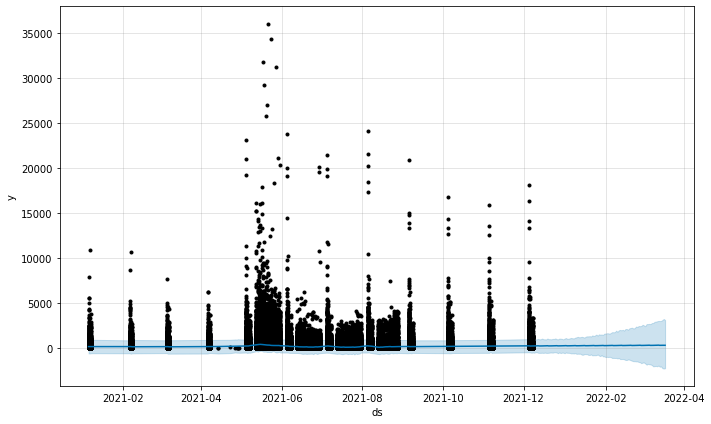

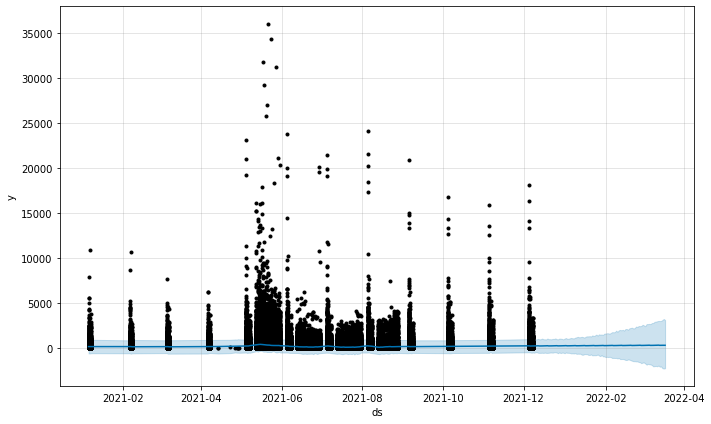

In [37]:
### plot the predicted projection
model.plot(prediction)

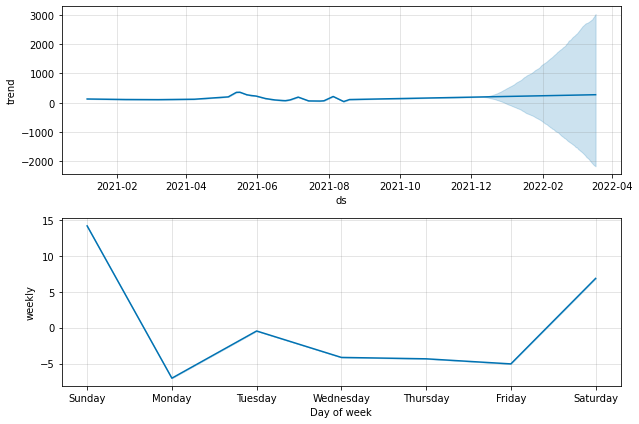

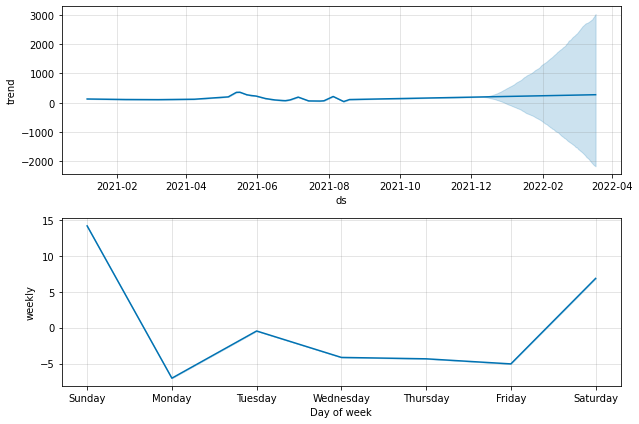

In [38]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [39]:
df.head()

,y,ds
0,443.0,2021-05-05
1,151.0,2021-05-05
2,483.0,2021-05-05
3,52.0,2021-05-05
4,326.0,2021-05-05


In [40]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='100 days', period='25 days', horizon = '50 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-08-30 00:00:00 and 2021-08-30 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-05,42.525477,-759.455274,748.923711,8.0,2021-08-30
1,2021-09-05,42.525477,-643.345660,755.849234,2039.0,2021-08-30
2,2021-09-05,42.525477,-679.432045,740.147296,1.0,2021-08-30
3,2021-09-05,42.525477,-763.026242,729.862914,2.0,2021-08-30
4,2021-09-05,42.525477,-695.263224,687.926374,1.0,2021-08-30


In [41]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,459334.949020,677.742539,206.045341,12.698543,1.501499,0.939095
1,8 days,91123.127930,301.866076,111.222348,17.450985,4.775191,0.971330
2,9 days,48937.593596,221.218430,88.728626,21.022868,8.625318,0.979977
3,36 days,810158.101317,900.087830,294.335245,8.975882,0.962738,0.963514
4,37 days,358694.886403,598.911418,179.930378,7.359801,0.965196,0.983671


In [42]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,459334.949020,677.742539,206.045341,12.698543,1.501499,0.939095
1,8 days,91123.127930,301.866076,111.222348,17.450985,4.775191,0.971330
2,9 days,48937.593596,221.218430,88.728626,21.022868,8.625318,0.979977
3,36 days,810158.101317,900.087830,294.335245,8.975882,0.962738,0.963514
4,37 days,358694.886403,598.911418,179.930378,7.359801,0.965196,0.983671


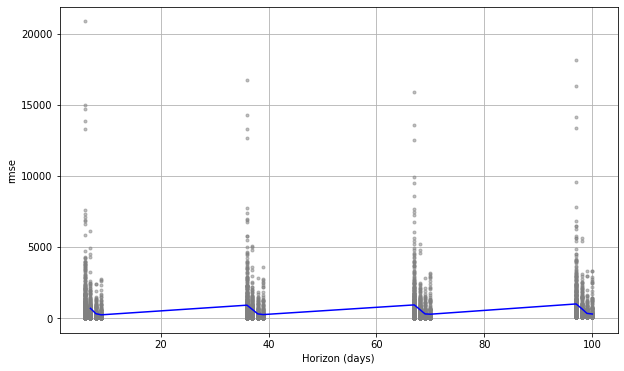

In [43]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

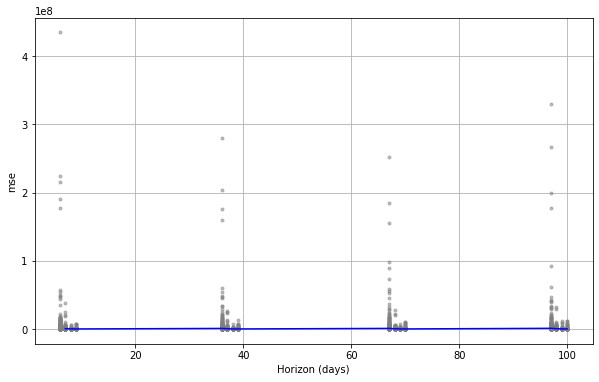

In [45]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

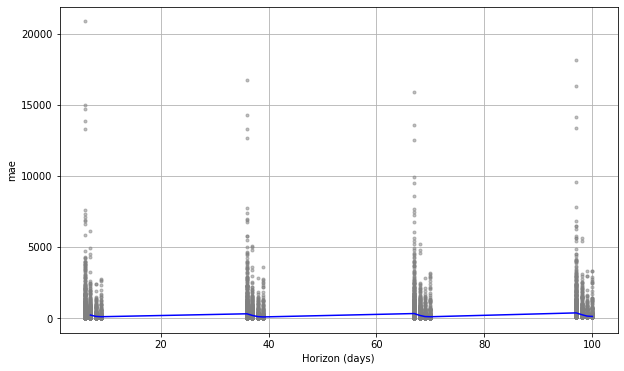

In [46]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

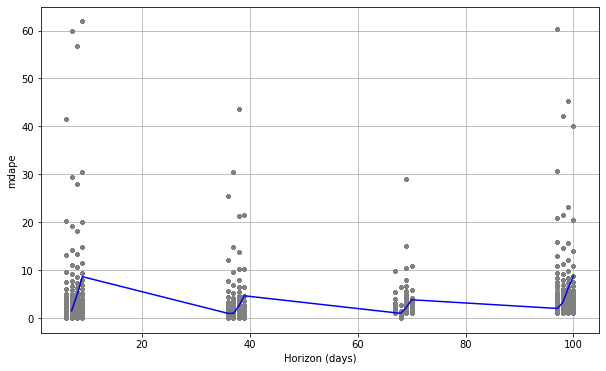

In [47]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')

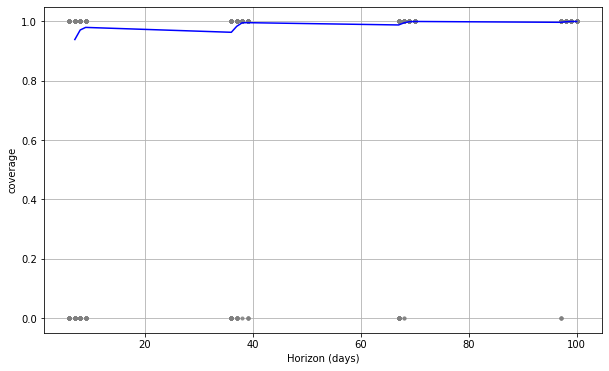

In [48]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='coverage')